Statistical Tests in Python

### Here is some boiler plate code that can be used to perform various tests in Python.
### You can cut and paste into your project with minor adjustments.

    - Independant samples t test
    - paired samples t test
    - One-way ANOVA
    - Between-subjects ANOVA
    - correlation
    - multiple regression
    - PCA
    - k means clustering
    - Bayes classification

In [86]:
import pandas as pd
import numpy as np

from scipy import stats
import statsmodels.api as sm

from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl

In [87]:
# display settings for notebook
%matplotlib inline
pd.set_option('display.max_columns',None)
pd.options.display.max_rows = 999

In [88]:
# load data

path = '/Users/rachelcooper/Library/CloudStorage/OneDrive-SMRS/' # change this path to your own

df = pd.read_csv(path + 'example_data/application_data_for_regression.csv')


# drop all rows with nulls
df = df.dropna()

# List of possible values
institution_types = ['college', 'university', 'other']

# Randomly assign values to the new column
df['random_institution_type'] = np.random.choice(institution_types, size=len(df))

# # a quick function to give us another grouping to work with
# def classify_provider(provider):
#     if 'college' in provider.lower():
#         return 'college'
#     elif 'university' in provider.lower():
#         return 'university'
#     else:
#         return 'other'

# df['institution_type'] = df['provider'].apply(classify_provider)

# add another column to show dummy data for previous year applications
df['N_applications_previous_year'] = df['N_applications'] + np.random.randint(1, 171, size=len(df))


# add column which cuts the mean_enrolments into 3 equal quantiles
df['enrolment_group'] = pd.qcut(df['mean_enrolments'], q=2, labels=['Low', 'High'])
df['enrolment_group'].value_counts()


df['enrolment_group_q3'] = pd.qcut(df['mean_enrolments'], q=3, labels=['Low', 'Medium', 'High'])

# df['enrolment_group_q3'].value_counts()
df['enrolment_group'].value_counts()

Low     58
High    58
Name: enrolment_group, dtype: int64

In [89]:
df.head()

,provider,mean_enrolments,NSS_score,N_applications,random_institution_type,N_applications_previous_year,enrolment_group,enrolment_group_q3
0,AECC University College,223.000000,0.5476,690,college,842,Low,Low
1,"Arts University Bournemouth, the",1248.000000,0.7237,6775,college,6854,Low,Low
3,Bath Spa University,3868.000000,0.7170,15340,college,15388,Low,Medium
4,University College Birmingham,1362.333333,0.7542,3405,university,3533,Low,Low
8,Bournemouth University,4426.666667,0.6124,23565,university,23711,High,Medium


# Independent samples t test

#### Dependent variable = NSS score
#### independent variable = enrolment_group (low, high)

In [92]:
group_low = df[df['enrolment_group'] == 'Low']['NSS_score']
group_high = df[df['enrolment_group'] == 'High']['NSS_score']

t_statistic, p_value = stats.ttest_ind(group_low, group_high) # This is the t test

print(f"T-statistic: {t_statistic}")
print(f"P-value: {p_value}")

T-statistic: 0.48697799029746747
P-value: 0.627208953040208


Text(0.5, 1.0, 'NSS score by mean enrolments group (low or high)')

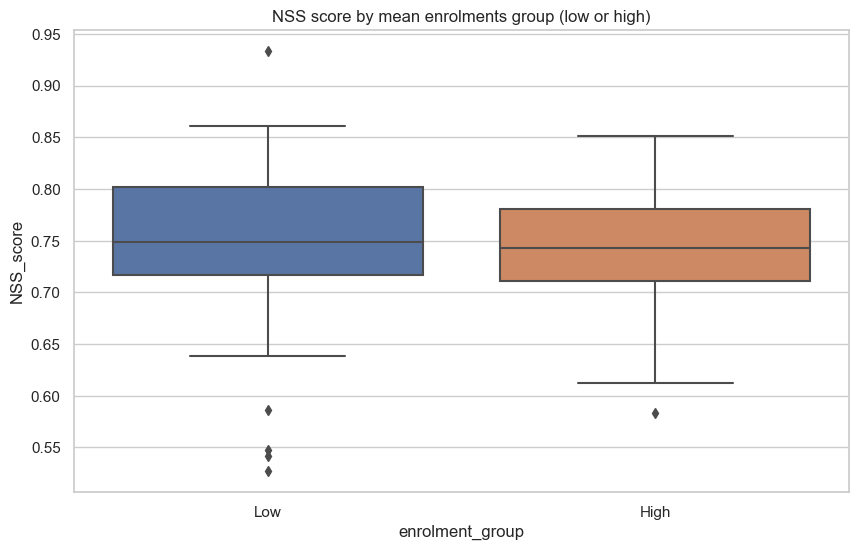

In [51]:
sns.set(style='whitegrid')
plt.figure(figsize=(10, 6))
sns.boxplot(x = 'enrolment_group', y = 'NSS_score', data = df)
plt.title('NSS score by mean enrolments group (low or high)')

# Paired samples t test

#### independent variable = year (current, previous)
#### dependent variable = N applications

In [93]:
t_statistic, p_value = stats.ttest_rel(df['N_applications'], df['N_applications_previous_year'])

print(f"T-statistic: {t_statistic}")
print(f"P-value: {p_value}")

T-statistic: -18.76096758183837
P-value: 8.642395428119872e-37


# One-way ANOVA

#### ANOVA with one independant variable (enrolment_group_q3) which has three levels
#### Dependant variable = NSS score

In [52]:
group_low = df[df['enrolment_group_q3'] == 'Low']['NSS_score']  
group_med = df[df['enrolment_group_q3'] == 'Medium']['NSS_score'] 
group_high = df[df['enrolment_group_q3'] == 'High']['NSS_score'] 

f_statistic, p_value = stats.f_oneway(group_low, group_med, group_high)

print(f"F-statistic: {f_statistic}")
print(f"P-value: {p_value}")

F-statistic: 0.17118541018845693
P-value: 0.8428834376213776


Text(0.5, 1.0, 'NSS score by mean enrolments group (low or high)')

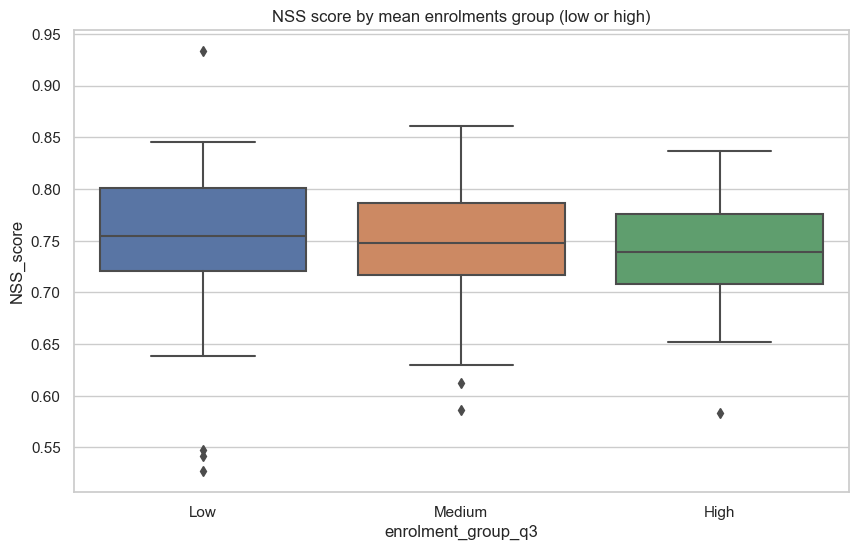

In [53]:
sns.set(style='whitegrid')
plt.figure(figsize=(10, 6))
sns.boxplot(x = 'enrolment_group_q3', y = 'NSS_score', data = df)
plt.title('NSS score by mean enrolments group (low or high)')

# Between-subjects ANOVA

In [95]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

# Assuming df is your dataframe and it has been loaded already
model = ols('NSS_score ~ C(enrolment_group_q3) * C(random_institution_type)', data=df).fit()
anova_table = anova_lm(model, typ=2)

anova_table

,sum_sq,df,F,PR(>F)
C(enrolment_group_q3),0.001656,2.0,0.176478,0.838461
C(random_institution_type),0.003814,2.0,0.406611,0.666928
C(enrolment_group_q3):C(random_institution_type),0.017832,4.0,0.950432,0.437970
Residual,0.501882,107.0,NaN,NaN


### Create interaction plot to show interactions and/or main effects/simple effects

Text(0.5, 1.0, 'Interaction and Main Effects')

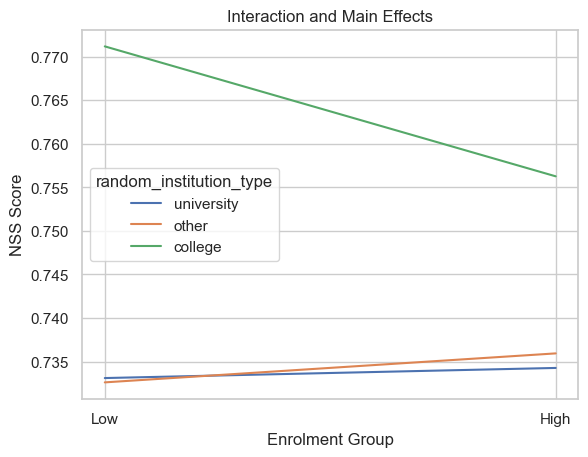

In [66]:
sns.lineplot(x='enrolment_group', y='NSS_score', hue='random_institution_type', data=df, markers=True, dashes=False, ci = None)

# Customize the plot
plt.xlabel('Enrolment Group')
plt.ylabel('NSS Score')
plt.title('Interaction and Main Effects')

# Correlation

In [96]:
correlation_coefficient, p_value = stats.pearsonr(df['NSS_score'], df['mean_enrolments'])

print(f"Correlation coefficient: {correlation_coefficient}")
print(f"P-value: {p_value}")

Correlation coefficient: -0.029956915962887007
P-value: 0.7495571340765007


## Example correlation matrix

In [97]:
df_corr = pd.read_csv(path + 'example_data/Culture_survey_Corr_example.csv')

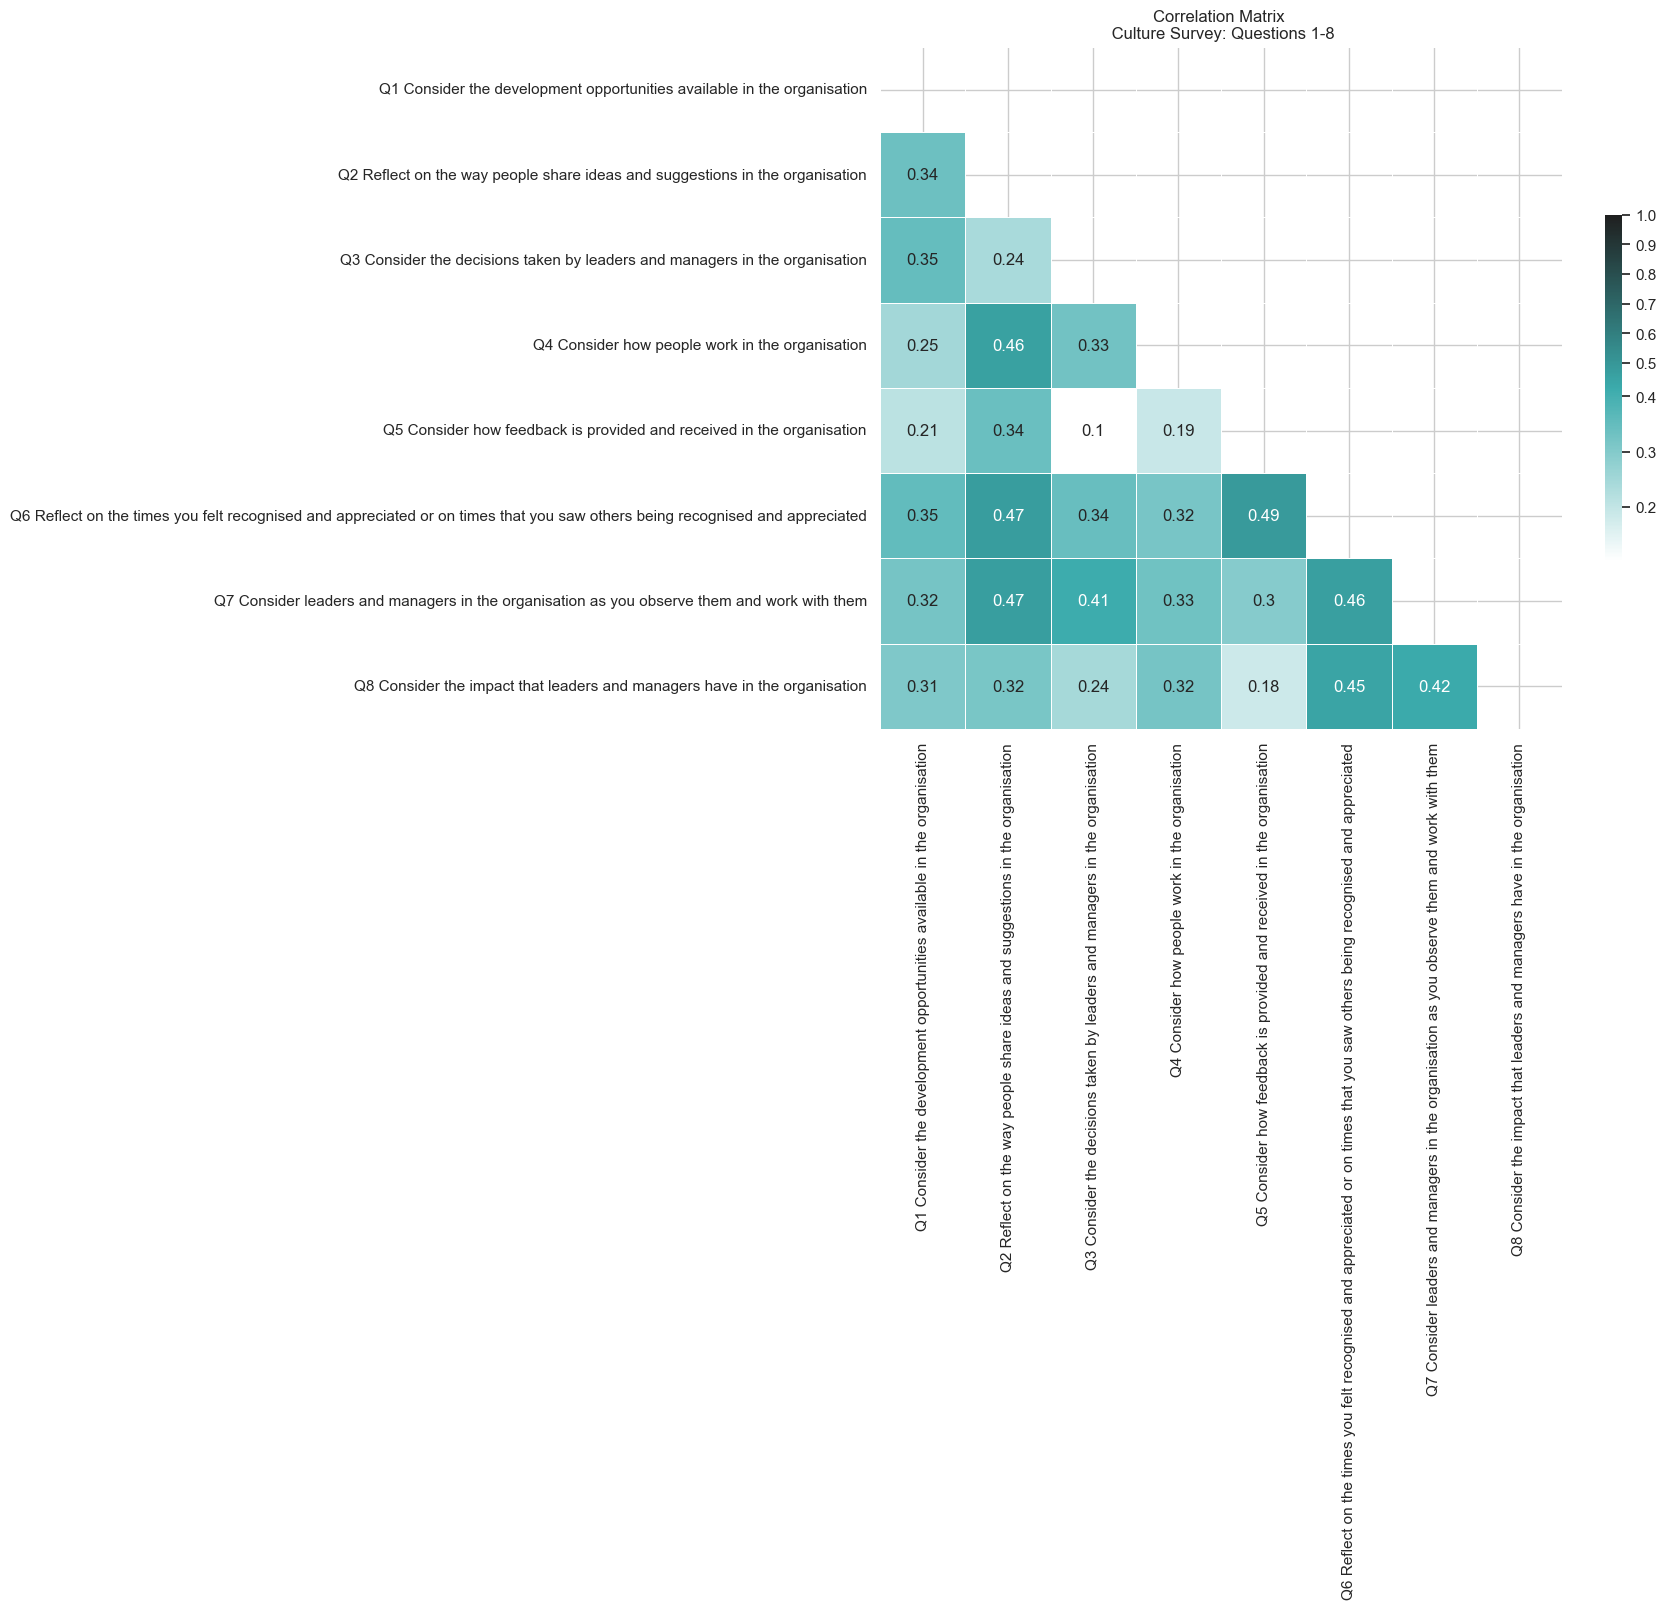

In [98]:
# # Compute the correlation matrix
from matplotlib.colors import LinearSegmentedColormap, TwoSlopeNorm

# select all the numeric columns as below, or select the data you want to enter
df_numeric = df_corr.select_dtypes(include=[np.number])
data = df_numeric
corr = data.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Define your hex colors
colors = [ '#ffffff','#3babac','#1f1f1f' ]

# Create a colormap
cmap = LinearSegmentedColormap.from_list('mycmap', colors)

vmin = corr.min().min()  # Minimum correlation
vmax = corr.max().max()  # Maximum correlation
midpoint = corr.mean().mean()  # Mean correlation

# Create the colormap norm object
norm = TwoSlopeNorm(vmin=vmin, vcenter=midpoint, vmax=vmax)

# Draw the heatmap with the mask and custom aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, norm=norm,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot = True)


ax.set_title("Correlation Matrix \n Culture Survey: Questions 1-8")

# save the file to your path
plt.savefig(path + 'example_data/corr_matrix_example.png', dpi=300, bbox_inches = "tight")


# Regression

In [31]:
X = df[['mean_enrolments', 'NSS_score']]
X = sm.add_constant(X)  # Adds a constant term to the predictor
y = df['N_applications']

model = sm.OLS(y, X)
results = model.fit()

# Displaying the results
coefficients = results.params
print(coefficients)
print(results.summary())

const             -14788.025596
mean_enrolments        4.374909
NSS_score          18623.373003
dtype: float64
                            OLS Regression Results                            
Dep. Variable:         N_applications   R-squared:                       0.677
Model:                            OLS   Adj. R-squared:                  0.672
Method:                 Least Squares   F-statistic:                     118.6
Date:                Wed, 06 Sep 2023   Prob (F-statistic):           1.76e-28
Time:                        12:26:36   Log-Likelihood:                -1196.1
No. Observations:                 116   AIC:                             2398.
Df Residuals:                     113   BIC:                             2407.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
---------------

#### Standardize all predictor and dependant variables

In [32]:
from sklearn.preprocessing import StandardScaler

# Selecting numeric columns and dropping NA values
df_numeric = df.select_dtypes(include=[np.number]).dropna()

# Initializing the StandardScaler
scaler = StandardScaler()

# Fitting and transforming the data
df_z = pd.DataFrame(scaler.fit_transform(df_numeric), columns=df_numeric.columns, index=df_numeric.index)

#### Re-run the regression to get the now <b>standardized</b> coefficients

In [100]:
X = df_z[['mean_enrolments', 'NSS_score']]
X = sm.add_constant(X)  # Adds a constant term to the predictor
y = df_z['N_applications']

model = sm.OLS(y, X)
results = model.fit()

# Displaying the results
coefficients = results.params
print(coefficients)
print(results.summary())

const             -9.714451e-17
mean_enrolments    8.200993e-01
NSS_score          9.780872e-02
dtype: float64
                            OLS Regression Results                            
Dep. Variable:         N_applications   R-squared:                       0.677
Model:                            OLS   Adj. R-squared:                  0.672
Method:                 Least Squares   F-statistic:                     118.6
Date:                Wed, 06 Sep 2023   Prob (F-statistic):           1.76e-28
Time:                        15:58:12   Log-Likelihood:                -98.993
No. Observations:                 116   AIC:                             204.0
Df Residuals:                     113   BIC:                             212.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
---------------

#### A seaborn pairplot is a good way to visualise a matrix of scatterplots with the density plot (i.e., distribution)

/Users/rachelcooper/opt/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


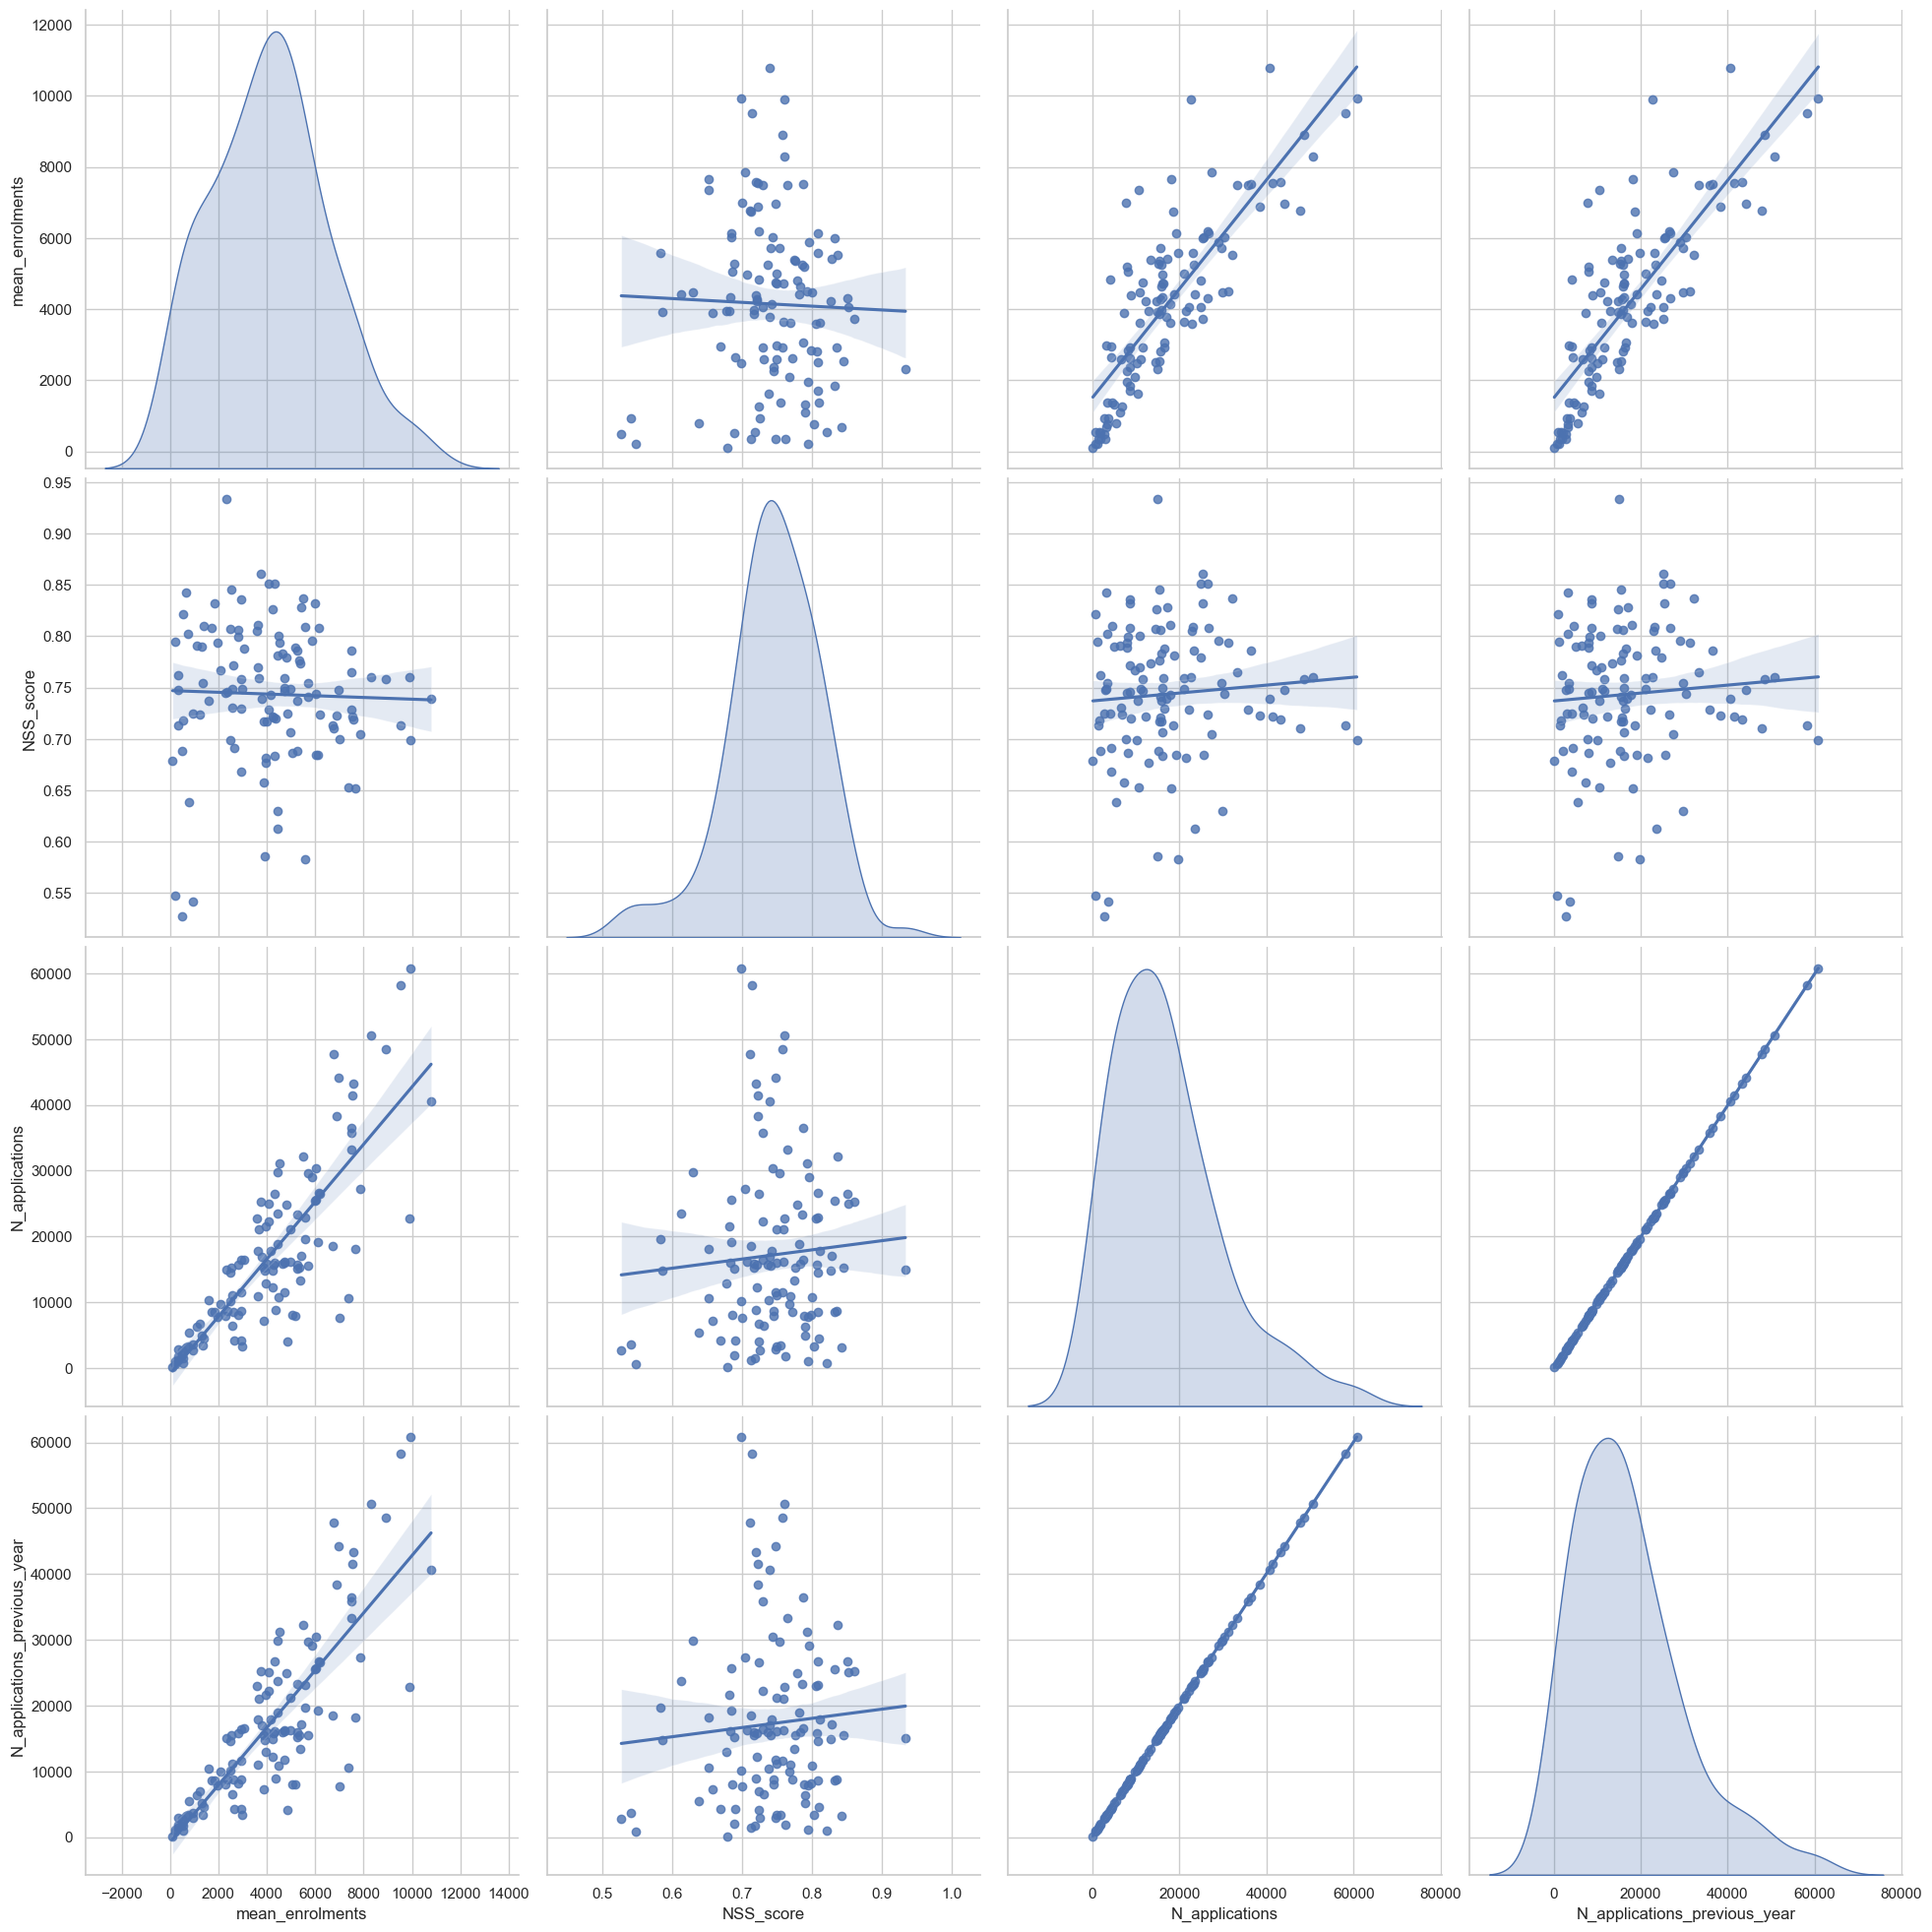

In [75]:
sns.pairplot(df, diag_kind="kde", kind="reg", size = 5)

# Principal components analysis

In [78]:
from sklearn.decomposition import PCA

# Create a PCA that will retain 99% of the variance
pca = PCA(n_components=0.99, whiten=True)

# Conduct PCA
features_pca = pca.fit_transform(df_numeric)

In [ ]:
pd.DataFrame(features_pca)

# The components are stored in a 2D numpy array, where each row represents a principal component
# and each column corresponds to one original feature
components = pd.DataFrame(pca.components_, columns=data.columns)

components

# K-means clustering

Text(0.5, 1.0, 'Elbow Method For Optimal k')

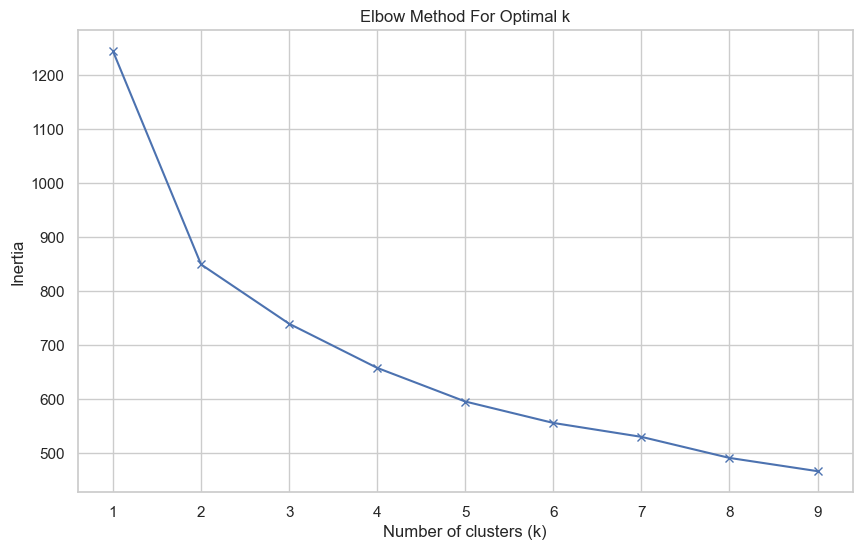

In [81]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

K = range(1, 10)
inertias = []

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_numeric)
    inertias.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(K, inertias, 'bx-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')

In [138]:
# choose the number of clusters that you think is appropriate
k = 3

kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(df_numeric)

KMeans(n_clusters=3, random_state=42)

In [139]:
# Get the cluster labels
labels = kmeans.labels_

# Add the labels to the original dataframe
df_numeric['Cluster'] = labels


score = silhouette_score(df_numeric, labels)
print("Silhouette score:", score)

Silhouette score: 0.22678422092242737


The silhouette score is a measure for the quality of clustering algorithms, and it ranges from -1 to +1. Here's how to interpret the silhouette score:

Near +1: A high silhouette score near +1 indicates that the sample is far away from the neighboring clusters. A score of +1 indicates that the clustering is appropriately done.

0: A silhouette score around 0 indicates overlapping clusters. The sample is very close to the decision boundary separating two neighboring clusters.

Near -1: A silhouette score near -1 indicates that the sample has been assigned to the wrong cluster because it is closer to a neighboring cluster than to the cluster it has been assigned to.

Here are some general guidelines for interpreting the silhouette score:

0.71 - 1.00: A strong structure has been found.
0.51 - 0.70: A reasonable structure has been found.
0.26 - 0.50: The structure is weak and could be artificial. Try additional methods to find a meaningful structure.
< 0.25: No substantial structure has been found.

### How to visualise a scatterplot in 3D

https://plotly.com/python/getting-started-with-chart-studio/

In [119]:
import chart_studio

# Create your API key for plotly chart studio
chart_studio.tools.set_credentials_file(username='Rachel_plotly', api_key='')

import chart_studio.plotly as py
import plotly.graph_objects as go
import plotly.express as px
import plotly.io as pio

In [140]:
df_numeric.head()

,Q1 Consider the development opportunities available in the organisation,Q2 Reflect on the way people share ideas and suggestions in the organisation,Q3 Consider the decisions taken by leaders and managers in the organisation,Q4 Consider how people work in the organisation,Q5 Consider how feedback is provided and received in the organisation,Q6 Reflect on the times you felt recognised and appreciated or on times that you saw others being recognised and appreciated,Q7 Consider leaders and managers in the organisation as you observe them and work with them,Q8 Consider the impact that leaders and managers have in the organisation,Cluster
0,3.0,5.0,3.0,4.0,2.0,2.0,2.0,3.0,1
1,5.0,5.0,5.0,5.0,5.0,5.0,5.0,4.0,0
2,3.0,3.0,5.0,2.0,1.0,2.0,2.0,3.0,1
3,4.0,5.0,5.0,5.0,4.0,4.0,5.0,3.0,0
4,4.0,5.0,3.0,5.0,5.0,3.0,4.0,3.0,0


In [143]:
df_numeric['Cluster'] = df_numeric['Cluster'].astype(str)

In [144]:
color_dict = {
    "0": "coral",
    "1": "lemonchiffon",
    "2": "lightslategrey"
}

In [145]:

fig = px.scatter_3d(df_numeric, x='Q1 Consider the development opportunities available in the organisation',
                    y='Q2 Reflect on the way people share ideas and suggestions in the organisation',
                    z='Q6 Reflect on the times you felt recognised and appreciated or on times that you saw others being recognised and appreciated',
                    color='Cluster',
                    # symbol='Cluster',
                        # symbol_sequence=['circle', 'square', 'cross'],
                        color_discrete_map=color_dict,
                        width=800, height=600)
fig.update_layout(scene=dict(xaxis_title='Q1',
                             yaxis_title='Q2',
                             zaxis_title='Q3'))
                      # title=dict(text=name, font=dict(size=20)))
    
    
pio.write_html(fig, file='interactive_plotly_figure.html', auto_open=True)
# py.plot(fig, file='interactive_plotly_figure.html', auto_open=True)